# Exploratory Data Analysis
This notebook contains all code for the prelimiatory analysis of the KDD Cup 98 datasets

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
import os
import numpy as np
import pandas as pd
from scipy import stats

os.chdir("../")
import util.data_loader as dl
from kdd98.transformers import *

In [180]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
# seaborn config
import seaborn as sns
sns.set(color_codes=True)
sns.set_style('ticks')
sns.axes_style({'spines.right': False,
                'axes.spines.top': False})
sns.set_palette('cubehelix', 8)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = (12, 8)
#plt.rcParams['image.cmap'] = 'viridis'

# figures:
# Where to save the figures
PROJECT_ROOT_DIR = "../../"
CHAPTER_ID = "eda"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "figures", CHAPTER_ID)

if not os.path.exists(IMAGES_PATH):
    os.makedirs(IMAGES_PATH)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Loading the learning dataset


Set working directory to main code folder

In [4]:
%autoreload 2  # automatically reloads modules
data_loader = dl.KDD98DataLoader("cup98LRN.txt")
learning = data_loader.get_dataset()

## Overview

A first, general look at the data structure:

In [5]:
learning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95412 entries, 95515 to 185114
Columns: 478 entries, ODATEDW to GEOCODE2
dtypes: category(24), float64(50), int64(297), object(107)
memory usage: 333.4+ MB


In [6]:
learning.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
CONTROLN,,,,,,,,,,,,,,,,,,,,,
95515,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
148535,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
15078,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
172556,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
7112,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A


### Numerical Features

In [7]:
numerical = learning.select_dtypes(include=np.number).columns
print(numerical)

Index(['AGE', 'NUMCHLD', 'INCOME', 'HIT', 'MBCRAFT', 'MBGARDEN', 'MBBOOKS',
       'MBCOLECT', 'MAGFAML', 'MAGFEM',
       ...
       'RAMNTALL', 'NGIFTALL', 'CARDGIFT', 'MINRAMNT', 'MAXRAMNT', 'LASTGIFT',
       'TIMELAG', 'AVGGIFT', 'TARGET_D', 'CLUSTER2'],
      dtype='object', length=347)


### Categorical Features

Categories were defined on import of the csv data. The categories were identified in the dataset dictionary.

In [8]:
categories = learning.select_dtypes(include='category').columns
print(categories)

Index(['TCODE', 'STATE', 'PVASTATE', 'DOMAIN', 'CLUSTER', 'CHILD03', 'CHILD07',
       'CHILD12', 'CHILD18', 'GENDER', 'WEALTH1', 'DATASRCE', 'SOLP3', 'SOLIH',
       'WEALTH2', 'GEOCODE', 'LIFESRC', 'RFA_2R', 'RFA_2F', 'RFA_2A',
       'MDMAUD_R', 'MDMAUD_F', 'MDMAUD_A', 'GEOCODE2'],
      dtype='object')


In [9]:
learning.loc[:, categories].describe()

,TCODE,STATE,PVASTATE,DOMAIN,CLUSTER,CHILD03,CHILD07,CHILD12,CHILD18,GENDER,...,WEALTH2,GEOCODE,LIFESRC,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
count,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,...,51589,95412,95412,95412,95412,95412,95412,95412,95412,95280
unique,55,57,3,17,54,4,4,4,4,7,...,10,8,4,1,4,4,5,4,5,5
top,0,CA,,R2,40,,,,,F,...,9,,,L,1,F,X,X,X,A
freq,40917,17343,93954,13623,3979,94266,93846,93601,92565,51277,...,6523,80168,54032,95412,47675,46964,95118,95118,95118,34484


### Object Features

These features have mixed datatypes and are encoded as strings. This hints at noisy data and features that will have to be transformed before becoming usable.

In [10]:
objects = learning.select_dtypes(include='object').columns
print(objects)

Index(['ODATEDW', 'OSOURCE', 'ZIP', 'MAILCODE', 'DOB', 'NOEXCH', 'RECINHSE',
       'RECP3', 'RECPGVG', 'RECSWEEP',
       ...
       'RDATE_22', 'RDATE_23', 'RDATE_24', 'MINRDATE', 'MAXRDATE', 'LASTDATE',
       'FISTDATE', 'NEXTDATE', 'TARGET_B', 'HPHONE_D'],
      dtype='object', length=107)


In [11]:
learning.loc[:, objects].describe()

,ODATEDW,OSOURCE,ZIP,MAILCODE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,...,RDATE_22,RDATE_23,RDATE_24,MINRDATE,MAXRDATE,LASTDATE,FISTDATE,NEXTDATE,TARGET_B,HPHONE_D
count,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,...,20873,7859,17738,95412,95412,95412,95412,85439,95412,95412
unique,54,896,19938,2,947,3,2,2,2,2,...,13,17,14,146,150,24,177,188,2,2
top,9501,MBC,85351,,0,0,,,,,...,9409,9408,9407,9602,9512,9512,9501,9504,0,1
freq,15358,4539,61,94013,23661,95085,88709,93395,95298,93795,...,11195,4522,7861,3041,10563,19896,2957,2253,90569,47765


### Date features
These are imported as strings and will have to be transformed later on to become useful.

In [12]:
dates = learning.loc[:, dl.date_features]
dates.describe()

,ODATEDW,DOB,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,...,RDATE_21,RDATE_22,RDATE_23,RDATE_24,LASTDATE,MINRDATE,MAXRDATE,FISTDATE,NEXTDATE,MAXADATE
count,95412,95412,95412,93462,93221,61822,91855,86538,91901,84167,...,9513,20873,7859,17738,95412,95412,95412,95412,85439,95412
unique,54,947,2,2,8,1,2,3,5,3,...,12,13,17,14,24,146,150,177,188,5
top,9501,0,9706,9606,9604,9604,9603,9602,9601,9511,...,9411,9409,9408,9407,9512,9602,9512,9501,9504,9702
freq,15358,23661,95399,93444,92405,61822,91804,81512,85468,80718,...,5006,11195,4522,7861,19896,3041,10563,2957,2253,95014


## Cleaning

We will leverage scikit-learn's transformer classes, and add our own custom transformers. This might on first glance look as a tedious way to clean data. However, it will be very powerful later on. The transformer's parameters are actually hyperparameters in model selection. This means that a grid-search can be employed to evaluate several different strategies for i.e. imputation of missing values, cutoff thresholds for sparse features and so on and find the best preprocessing steps.

sklearn doc:

* http://scikit-learn.org/dev/modules/generated/sklearn.compose.ColumnTransformer.html
* http://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
* http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OrdinalEncoder
#from category_encoders.hashing import HashingEncoder  # Use custom edits in local file instead

### Binary features

For these, we will convert the values specified as True and False as per the dataset dictionary into 1.0 and 0.0 respectively. Furthermore, input errors are also being treated. In the end, these features will be of dtype float64, having {1.0, 0.0 and NaN} as values.

For features that either have a value representing True or are empty (as specified in the dataset dictionary), all empty cells will be considered False. For features specifically denoting True and False values, these will be coded appropriately and empty cells set to NaN.

In [14]:
print(dl.boolean_features)

['MAILCODE', 'NOEXCH', 'RECSWEEP', 'RECINHSE', 'RECP3', 'RECPGVG', 'AGEFLAG', 'HOMEOWNR', 'MAJOR', 'COLLECT1', 'BIBLE', 'CATLG', 'HOMEE', 'PETS', 'CDPLAY', 'STEREO', 'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES', 'PEPSTRFL', 'TARGET_B', 'HPHONE_D', 'VETERANS']


In [15]:
%autoreload 2
bool_transformers = ColumnTransformer([
    ("bool_x_bl",
     BooleanFeatureRecode(value_map={'true': 'X', 'false': ' '}, correct_noisy=False),
     ['PEPSTRFL', 'NOEXCH', 'MAJOR', 'RECINHSE', 'RECP3', 'RECPGVG', 'RECSWEEP']
     ),
    ("bool_y_n",
     BooleanFeatureRecode(value_map={'true': 'Y', 'false': 'N'}, correct_noisy=False),
     ['COLLECT1', 'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'PETS', 'CDPLAY', 'STEREO',
      'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN',  'BOATS', 'WALKER', 'KIDSTUFF',
      'CARDS', 'PLATES']
     ),
    ("bool_e_i",
     BooleanFeatureRecode(value_map={'true': "E", 'false': 'I'}, correct_noisy=False),
     ['AGEFLAG']
     ),
    ("bool_h_u",
     BooleanFeatureRecode(value_map={'true': "H", 'false': 'U'}, correct_noisy=False),
     ['HOMEOWNR']),
    ("bool_b_bl",
     BooleanFeatureRecode(value_map={'true': 'B', 'false': ' '}, correct_noisy=False),
     ['MAILCODE']
     ),
    ("bool_1_0",
     BooleanFeatureRecode(value_map={'true': '1', 'false': '0'}, correct_noisy=False),
     ['HPHONE_D', 'TARGET_B']
     )
])

In [16]:
booleans = bool_transformers.fit_transform(learning)

In [17]:
bool_feature_names = [n[n.find('__')+2:]
                 for n in bool_transformers.get_feature_names()]

In [18]:
bools = pd.DataFrame(data=booleans, columns=bool_feature_names,
                     index=learning.index)

In [19]:
bools.describe()

,PEPSTRFL,NOEXCH,MAJOR,RECINHSE,RECP3,RECPGVG,RECSWEEP,COLLECT1,VETERANS,BIBLE,...,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,AGEFLAG,HOMEOWNR,MAILCODE,HPHONE_D,TARGET_B
count,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,5202.0,10426.0,8871.0,...,2028.0,10501.0,1536.0,1041.0,560.0,65864.000000,73184.000000,95412.000000,95412.000000,95412.000000
mean,0.474458,0.003354,0.003081,0.070253,0.021140,0.001195,0.016948,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.870643,0.715375,0.014663,0.500618,0.050759
std,0.499350,0.057816,0.055425,0.255575,0.143851,0.034546,0.129076,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.335598,0.451239,0.120199,0.500002,0.219506
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


Several features contain only very few actual feature values. These might get dropped by the sparsity transformer later on.

In [20]:
learning[bool_feature_names] = bools

### Zipcode

In [21]:
zip_transformer = ColumnTransformer([
    ("truncate_zip",
     ZipCodeFormatter(),
     ['ZIP']
     )
])

In [22]:
zip = zip_transformer.fit_transform(learning)

Just a quick sanity check

In [23]:
learning.ZIP.head()

CONTROLN
95515     61081
148535    91326
15078     27017
172556    95953
7112      33176
Name: ZIP, dtype: object

In [24]:
zip[0:5]

array([[61081.],
       [91326.],
       [27017.],
       [95953.],
       [33176.]])

Replace the zip coode feature

In [25]:
learning.ZIP = zip

### Categories


Some categories are already created on import of the data. Additionally, we will have to treat some special cases:

* Multibyte features. These are features that group together several related nominal features. These are mainly the promotion history codes. Recency, Frequency and Amount as of a particular mailing are glued together in one feature. For RFA_2 and additionally MDMAUD, the major donor matrix, the features were already spread out by the supplier of the data. These two were dropped on import of the CSV file and their spread out features kept.

* OSOURCE: It identifies the origin of the data for a particular record. However, it has so many levels that the feature space would get inflated heavily by one-hot encoding. For this feature, hasing is employed.

* TCODE: Special treatment will also be necessary for the TCODE feature. It describes the title code (Ms., Hon., and so on) in an unfortunate integer coding ranging from 1e0 to 1e4. For EDA, this will be ignored.

In [26]:
learning.select_dtypes(include="category").columns

Index(['TCODE', 'STATE', 'PVASTATE', 'DOMAIN', 'CLUSTER', 'CHILD03', 'CHILD07',
       'CHILD12', 'CHILD18', 'GENDER', 'WEALTH1', 'DATASRCE', 'SOLP3', 'SOLIH',
       'WEALTH2', 'GEOCODE', 'LIFESRC', 'RFA_2R', 'RFA_2F', 'RFA_2A',
       'MDMAUD_R', 'MDMAUD_F', 'MDMAUD_A', 'GEOCODE2'],
      dtype='object')

Treating multibyte features and OSOURCE:

In [27]:
print(dl.nominal_features)

['OSOURCE', 'RFA_3', 'RFA_4', 'RFA_5', 'RFA_6', 'RFA_7', 'RFA_8', 'RFA_9', 'RFA_10', 'RFA_11', 'RFA_12', 'RFA_13', 'RFA_14', 'RFA_15', 'RFA_16', 'RFA_17', 'RFA_18', 'RFA_19', 'RFA_20', 'RFA_21', 'RFA_22', 'RFA_23', 'RFA_24']


https://booking.ai/dont-be-tricked-by-the-hashing-trick-192a6aae3087

https://towardsdatascience.com/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159

In [28]:
hash_transformer = ColumnTransformer([
    ("hasher",
     HashingEncoder(),
     ['OSOURCE']
    )
])

multibyte_transformer = ColumnTransformer([
    ("promotion_history_spreader",
     MultiByteExtract(["R", "F", "A"]),
     dl.nominal_features[1:]
    )
])

Apply the transormations to all RFA_* features and the OSOURCE feature and extract the new feature names to build a pandas dataframe:

In [29]:
hashes = hash_transformer.fit_transform(learning)
feature_names_h = [n[n.find('__')+2:]
                 for n in hash_transformer.get_feature_names()]

In [30]:
multibytes = multibyte_transformer.fit_transform(learning)
feature_names_m = [n[n.find('__')+2:]
                 for n in multibyte_transformer.get_feature_names()]

Merge learning and the new nominal features, then drop the originals

In [31]:
multibytes = pd.DataFrame(data=multibytes, columns=feature_names_m,
                   index=learning.index).astype("category")
learning = learning.merge(multibytes, on=learning.index.name)

hashes = pd.DataFrame(data=hashes, columns=feature_names_h,
                   index=learning.index)
learning = learning.merge(hashes, on=learning.index.name)

learning = learning.drop(dl.nominal_features, axis=1)

### Dates

There are several date features. ODATEDW is the date the record was added, DOB the birth date. ADATE_* and RDATE_* are from the promotion history. ADATE_* is the date of a mailing, RDATE_* the date the donation for the corresponding mailing was received. While these dates are not of particular interest (very low variance), the time it took to respond might be.

Two different transformations are applied:

1. ODATEDW, DOB: Get transformed to years before 1997 -> membership duration, age
2. For the promotion history, as specified above, the time for response in months

In [32]:
print(dl.date_features)

['ODATEDW', 'DOB', 'ADATE_2', 'ADATE_3', 'ADATE_4', 'ADATE_5', 'ADATE_6', 'ADATE_7', 'ADATE_8', 'ADATE_9', 'ADATE_10', 'ADATE_11', 'ADATE_12', 'ADATE_13', 'ADATE_14', 'ADATE_15', 'ADATE_16', 'ADATE_17', 'ADATE_18', 'ADATE_19', 'ADATE_20', 'ADATE_21', 'ADATE_22', 'ADATE_23', 'ADATE_24', 'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7', 'RDATE_8', 'RDATE_9', 'RDATE_10', 'RDATE_11', 'RDATE_12', 'RDATE_13', 'RDATE_14', 'RDATE_15', 'RDATE_16', 'RDATE_17', 'RDATE_18', 'RDATE_19', 'RDATE_20', 'RDATE_21', 'RDATE_22', 'RDATE_23', 'RDATE_24', 'LASTDATE', 'MINRDATE', 'MAXRDATE', 'FISTDATE', 'NEXTDATE', 'MAXADATE']


In [34]:
date_transformer = ColumnTransformer([
    ("parse_dates",
     ParseDates(treat_errors='ignore'),
     dl.date_features
     )
])

In [35]:
dates = date_transformer.fit_transform(learning)

In [36]:
date_feature_names = [n[n.find('__')+2:]
                 for n in date_transformer.get_feature_names()]

In [37]:
dates = pd.DataFrame(dates, columns=date_feature_names, index=learning.index)

In [41]:
learning[date_feature_names] = dates

Now, we transform the dates from the giving history. First, we create two dataframes with the sending dates of the mailings and the dates when the gift (donation) for these was received.

In [42]:
don_hist_transformer = ColumnTransformer([
    ("months_to_donation",
     MonthsToDonation(),
     dl.don_hist_dates
     )
])

In [43]:
donation_responses = don_hist_transformer.fit_transform(learning)

In [44]:
don_hist_feature_names = [n[n.find('__')+2:]
                 for n in don_hist_transformer.get_feature_names()]

In [45]:
donation_responses = pd.DataFrame(
    donation_responses, index=learning.index, columns=don_hist_feature_names)

In [46]:
learning = learning.merge(donation_responses, on=learning.index.name)
learning.drop(dl.don_hist_dates, axis=1, inplace=True)
learning.drop("ADATE_2", axis=1, inplace=True) # This is a constant feature, containing the sending date of the current mailing.

Now, we compute time deltas with either a specific reference, or the date of the most recent mailing as a reference:

* Time since last donation
* Delta between first and next donation
* Age, years membership

In [81]:
duration_transformer = ColumnTransformer([
    ("time_last_donation", DeltaTime(unit='months'), ['LASTDATE']),
    ("delta_first_next", DeltaTime(reference_date=learning.NEXTDATE), ['FISTDATE']),
    ("age_membership_years", DeltaTime(unit='years'),['ODATEDW', 'DOB'])
])

In [82]:
durations = duration_transformer.fit_transform(learning)

In [83]:
duration_feature_names = [n[n.find('__')+2:]
                 for n in duration_transformer.get_feature_names()]

In [109]:
durations = pd.DataFrame(durations, index=learning.index,columns=duration_feature_names)

In [112]:
learning = learning.merge(durations, on=learning.index.name)

## Actual EDA

A look at the label (amount donated in US dollars)

Saving figure label_distribution


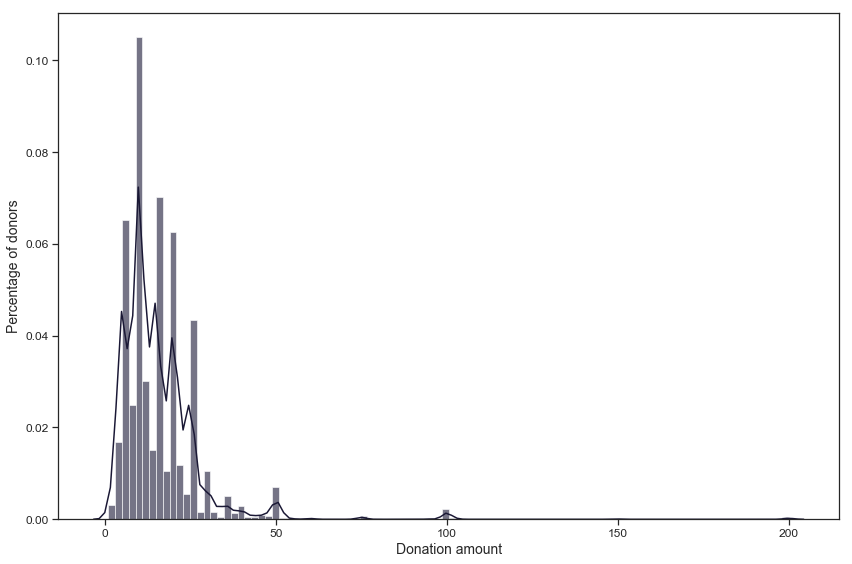

In [222]:
fig = sns.distplot(learning.loc[learning.TARGET_D > 0, 'TARGET_D'], bins=100, hist_kws={'alpha': 0.6});
plt.xlabel("Donation amount");
plt.ylabel("Percentage of donors");
save_fig('label_distribution')

Saving figure label_ratio_binary


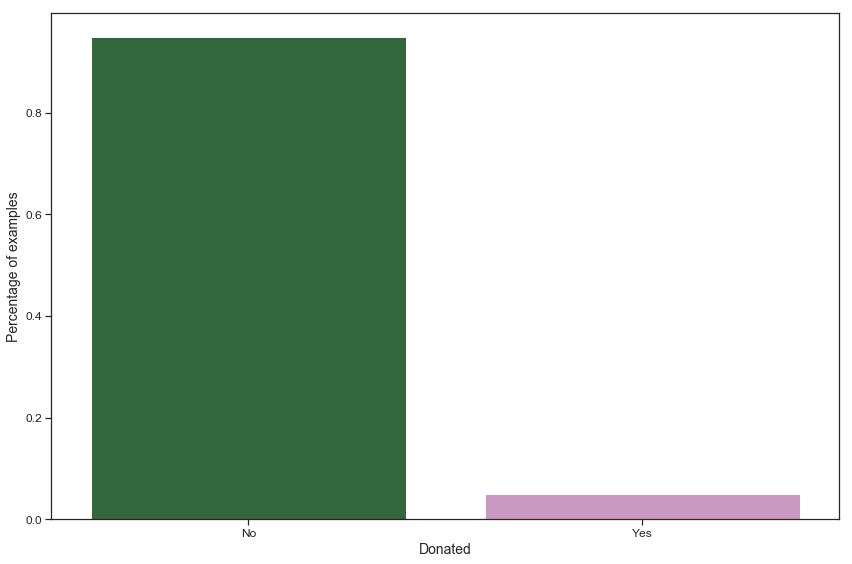

In [223]:
fig = sns.barplot(x = [0,1], y = learning.groupby('TARGET_B')['TARGET_B'].count()/len(learning.index), palette=sns.color_palette('cubehelix',2));
fig.set_xticklabels(["No", "Yes"]);
plt.xlabel("Donated");
plt.ylabel("Percentage of examples");
save_fig(fig_id="label_ratio_binary");

* The label is imbalanced, with roughly 
* Most donations are below 20 dollars.
* Spikes are visible for 5, 10, 15, 20, 25, 50, 100 and 200 $
* The distribution is right-skewed

Checking the claim from the documentation that donations are positively correlated with the time since the last donation. We plot the duration since the last gift against the donation amount for the current campaign. The marker size indicates the total amount an example has donated so far.

It is evident that from a lag of &geq; 15 months, donations increase indeed, and over the whole spectrum of amounts. We see a marked difference in 100- and 50 $ donations.

Saving figure donations_time_since_last_total_alltime_donations


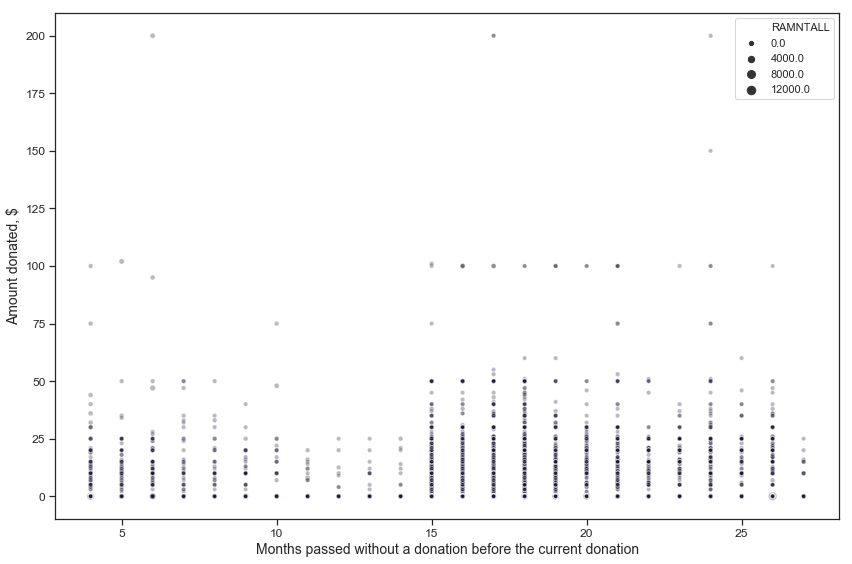

In [224]:
sns.scatterplot(x='LASTDATE_DELTA_MONTHS',y='TARGET_D', size='RAMNTALL', alpha=0.3, data=learning.loc[learning.RAMNTALL > 0,:], palette=sns.color_palette('cubehelix',2))
plt.xlabel("Months passed without a donation before the current donation");
plt.ylabel("Amount donated, $");
save_fig(fig_id="donations_time_since_last_total_alltime_donations")

In [202]:
help(sns.violinplot)

Help on function violinplot in module seaborn.categorical:

violinplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None, **kwargs)
    Draw a combination of boxplot and kernel density estimate.
    
    A violin plot plays a similar role as a box and whisker plot. It shows the
    distribution of quantitative data across several levels of one (or more)
    categorical variables such that those distributions can be compared. Unlike
    a box plot, in which all of the plot components correspond to actual
    datapoints, the violin plot features a kernel density estimation of the
    underlying distribution.
    
    This can be an effective and attractive way to show multiple distributions
    of data at once, but keep in mind that the estimation procedure is
    influenced by the sa

Donations by living environment (C=City, R=Rural, S=Suburban, T=Town,U=Urban; lowest numbers represent highest socio-economic ranking). Major donors versus non-major donors.

Surprisingly, one of the top donations came from a rural region of low socio-economic status. Major donors that donated this time are not present in the lowest socio-economic environments.

Saving figure donations_vs_living_environment


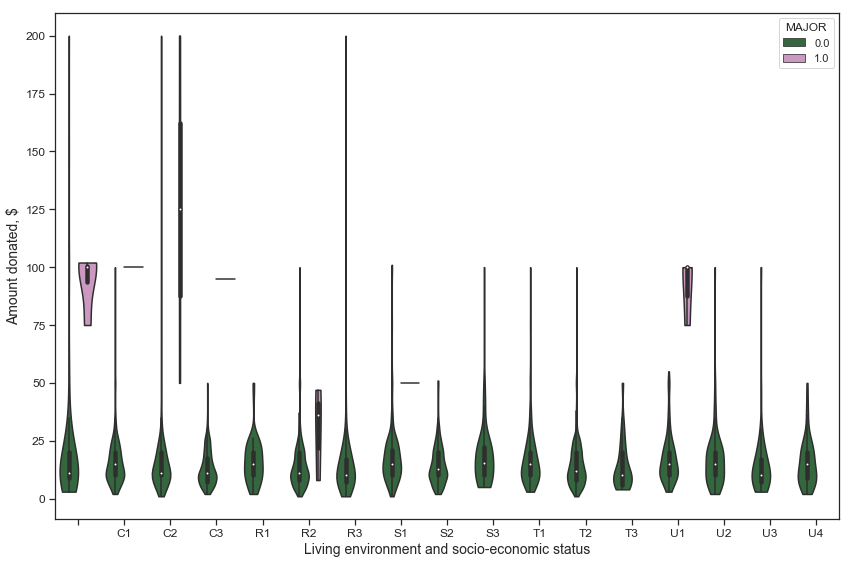

In [232]:
sns.violinplot(y="TARGET_D", x="DOMAIN", hue='MAJOR',cut=0, data=learning.loc[learning.TARGET_D > 0,:],palette=sns.color_palette('cubehelix',2))
plt.xlabel("Living environment and socio-economic status");
plt.ylabel("Amount donated, $");
save_fig(fig_id="donations_vs_living_environment")

All-time donations by environment. The y- axis is in log scale. We see now that each socio-economic environment also harbours major donors.

Saving figure donations_vs_living_environment


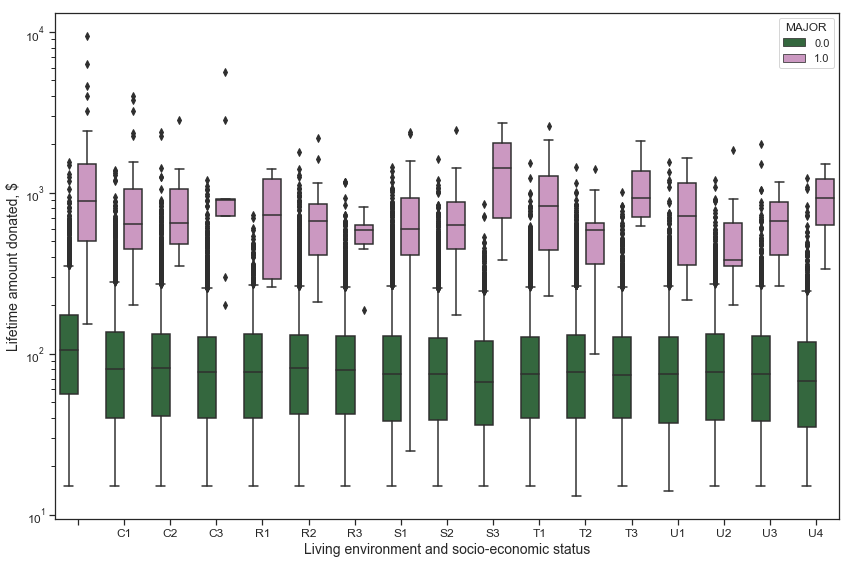

In [233]:
fig=sns.boxplot(y="RAMNTALL", x="DOMAIN", hue='MAJOR', data=learning,palette=sns.color_palette('cubehelix',2))
fig.set_yscale('log')
plt.xlabel("Living environment and socio-economic status");
plt.ylabel("Lifetime amount donated, $");
save_fig(fig_id="donations_vs_living_environment")

### Correlations

-> Product moment covariance

Since there are so many features, we will plot those who have a significant correlation only.

In [ ]:
corr_all = learning.drop(['TARGET_B','TARGET_D'], axis=1).corr()

sns.heatmap(corr_all[corr_all >= 0.4 | corr_all <= -0.4],
            cmap="viridis", vmax=1.0, center = 0.0, square=True,
            linewidths = 0.1)

### Correlations between numerical features, excluding US census data

In [206]:
data_exclude_census_numeric = learning[learning.columns.difference(dl.us_census_features)].select_dtypes(include=["float64", "int64"])
data_exclude_census_numeric.head()

,AGE,AGEFLAG,AVGGIFT,BIBLE,BOATS,CARDGIFT,CARDPM12,CARDPROM,CARDS,CATLG,...,STATEGOV,STEREO,TARGET_B,TARGET_D,TIMELAG,VETERANS,VIETVETS,WALKER,WWIIVETS,ZIP
CONTROLN,,,,,,,,,,,,,,,,,,,,,
95515,60.0,NaN,7.741935,NaN,NaN,14,6,27,NaN,NaN,...,2,NaN,0.0,0.0,4.0,NaN,34,NaN,18,61081.0
148535,46.0,1.0,15.666667,NaN,NaN,1,6,12,NaN,NaN,...,2,NaN,0.0,0.0,18.0,NaN,55,NaN,11,91326.0
15078,NaN,NaN,7.481481,NaN,NaN,14,6,26,NaN,NaN,...,8,NaN,0.0,0.0,12.0,NaN,29,NaN,33,27017.0
172556,70.0,1.0,6.812500,NaN,NaN,7,6,27,NaN,NaN,...,0,NaN,0.0,0.0,9.0,NaN,14,NaN,31,95953.0
7112,78.0,1.0,6.864865,1.0,NaN,8,10,43,1.0,1.0,...,3,1.0,0.0,0.0,14.0,NaN,9,1.0,53,33176.0


In [208]:
data_exclude_census_corr = data_exclude_census_numeric[data_exclude_census_numeric.columns.difference(['TARGET_B','TARGET_D'])].corr()

Saving figure numeric_correlations_without_census


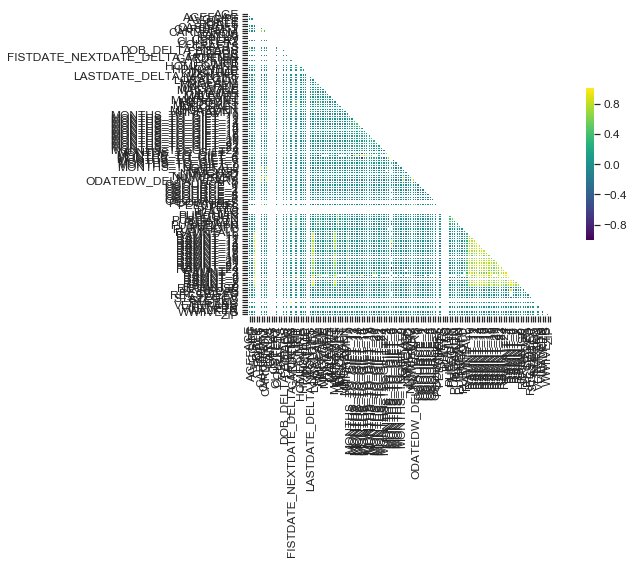

In [209]:
mask = np.zeros_like(data_exclude_census_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(data_exclude_census_corr, mask=mask, cmap="viridis", vmax=1.0, center=0,
            square=True, linewidths=.1, cbar_kws={"shrink": .5}, xticklabels=True,yticklabels=True)

In [210]:
data_exclude_census_corr.head()

,AGE,AGEFLAG,AVGGIFT,BIBLE,BOATS,CARDGIFT,CARDPM12,CARDPROM,CARDS,CATLG,...,RECPGVG,RECSWEEP,STATEGOV,STEREO,TIMELAG,VETERANS,VIETVETS,WALKER,WWIIVETS,ZIP
AGE,1.000000,0.031811,-0.089998,NaN,NaN,0.268417,0.051783,0.285583,NaN,NaN,...,0.016315,0.030696,0.012102,NaN,-0.009806,NaN,-0.163264,NaN,0.197312,0.023467
AGEFLAG,0.031811,1.000000,-0.016257,NaN,NaN,-0.014518,-0.009026,-0.028122,NaN,NaN,...,-0.009397,-0.004237,-0.000355,NaN,-0.001866,NaN,0.002707,NaN,-0.008864,-0.078912
AVGGIFT,-0.089998,-0.016257,1.000000,NaN,NaN,-0.268607,-0.013944,-0.189500,NaN,NaN,...,0.140120,-0.007986,-0.017977,NaN,0.077111,NaN,-0.005370,NaN,-0.026297,0.041645
BIBLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BOATS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Giving history correlations

In [214]:
prom_hist_f = list(donation_responses.columns)+list(multibytes.columns)+dl.promotion_history_summary+dl.giving_history_summary

In [215]:
promotion_history_features = learning.loc[:,prom_hist_f]

Saving figure correlations_promotion_giving_history


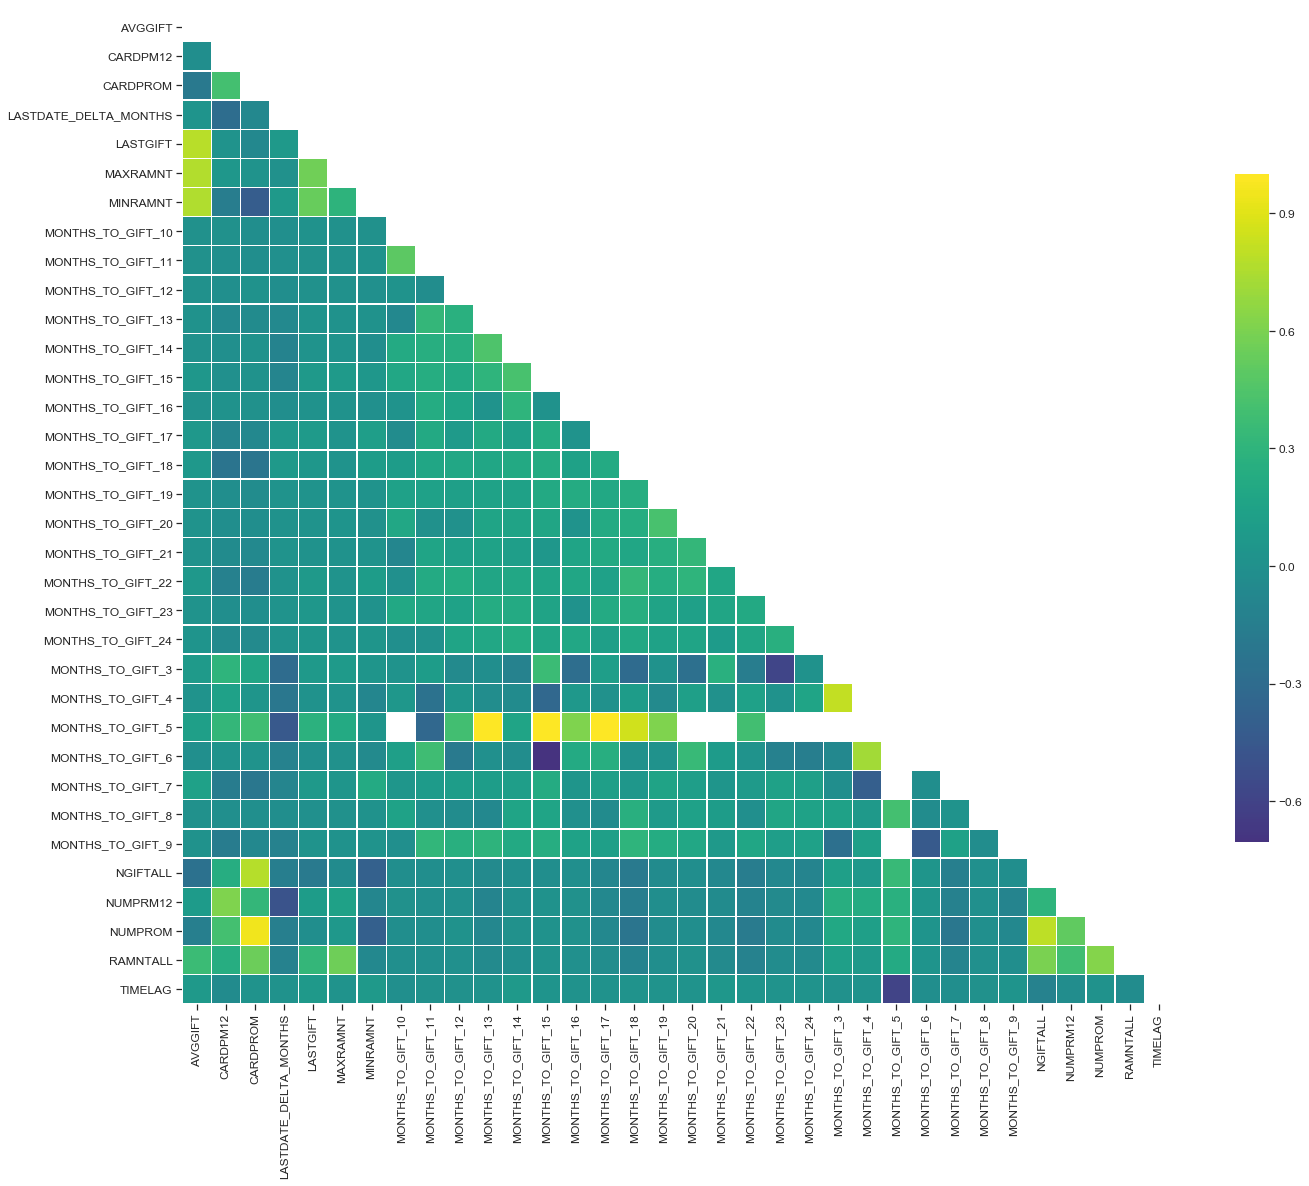

In [216]:
prom_giving_corr = promotion_history_features[promotion_history_features.columns.difference(['TARGET_B','TARGET_D'])].corr()
mask = np.zeros_like(prom_giving_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(prom_giving_corr, mask=mask, cmap="viridis", vmax=1.0, center=0,
            square=True, linewidths=.3, cbar_kws={"shrink": .5}, xticklabels=True,yticklabels=True)
save_fig(fig_id="correlations_promotion_giving_history")

### Puttting donors on a map

In [235]:
num_donors_by_zip = learning[['ZIP', 'TARGET_B']].groupby('ZIP', as_index=False).agg('sum') # number of people who donated
num_members_by_zip = learning[['ZIP', 'TARGET_B']].groupby('ZIP', as_index=False).agg('count') # number of people who are registered at that ZIP
cum_donation_by_zip = learning[['ZIP', 'TARGET_D']].groupby('ZIP', as_index=False).agg('sum')
zip_states = learning[['ZIP','STATE']].drop_duplicates()

In [236]:
data_by_zip = cum_donation_by_zip.merge(num_members_by_zip, on='ZIP').merge(zip_states, on='ZIP')
data_by_zip.columns = ["ZIP", "CumDonation", "MemberCount", "State"]

In [237]:
def rel_donation(row):
    if row.CumDonation != 0.0:
        return row.CumDonation/(1.0 if row.MemberCount == 0.0 else row.MemberCount)
    else:
        return 0.0

data_by_zip['RelDonation'] = data_by_zip.apply(rel_donation,axis=1)

In [238]:
from geopy.geocoders import Here
from geopy.extra.rate_limiter import RateLimiter
from geopy.exc import GeocoderTimedOut

def do_geo_query(q):
    geolocator = Here(app_id="ZJBxigwxa1QPHlWrtWH6", app_code="OJBun02aepkFbuHmYn1bOg")
    geocode = RateLimiter(geolocator.geocode, min_delay_seconds=0.01, max_retries=4)
    try:
        return geolocator.geocode(query=q, exactly_one=True)
    except GeocoderTimedOut:
        return do_geo_query(q)

def get_loc(example):
    if example.ZIP:
        zip = str(int(example.ZIP)).rjust(5, '0')
        q = {'postalcode': zip, 'state': example.State}
        return do_geo_query(q)
    else:
        return None
    
def extract_coords(location):
    return [location.latitude, location.longitude]

In [239]:
import pickle
from tqdm import tqdm

tqdm.pandas()

try:
    zip_data = open("zip_data.pkl", "rb")
    locations = pickle.load(zip_data)
    zip_data.close()
except Exception as e:
    locations = data_by_zip.progress_apply(get_loc, axis=1)
    locations = pd.DataFrame(locations, columns="location")
    locations['ZIP'] = data_by_zip.ZIP
    zip_data = open("zip_data.pkl", "wb")
    pickle.dump(locations, zip_data)
    zip_data.close()


In [240]:
data_by_zip = data_by_zip.merge(locations, on='ZIP')

In [241]:
data_by_zip.loc[:,'longitude'] = data_by_zip.location.apply(lambda l: l.longitude if l != None else None)
data_by_zip.loc[:,'latitude'] = data_by_zip.location.apply(lambda l: l.latitude if l != None else None)

AA, AE and AP stand for armed services. ZIP codes don't work here, they point anywhere. Also, we only include locations where someone has actually donated by filtering on CumDonation.

In [246]:
data_by_zip1 = data_by_zip.loc[data_by_zip.State != ['AA','AE','AP'],:]
data_by_zip2 = data_by_zip1.loc[data_by_zip1.CumDonation > 0.0,:]

In [ ]:
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import cartopy.feature as cfeature
fig = plt.figure(figsize=(20,16))

osm_terrain = cimgt.OSM()


ax = fig.add_subplot(1, 1, 1, projection=osm_terrain.crs)

ax.set_extent([-166, -65, 10, 65], crs=ccrs.PlateCarree())
ax.add_image(osm_terrain, 6)

lon = data_by_zip2.longitude
lat = data_by_zip2.latitude
mc = data_by_zip2.MemberCount
cd = data_by_zip2.CumDonation
rd = data_by_zip2.RelDonation

data_by_zip2.plot(kind="scatter",x="longitude",y="latitude",ax=ax,
                  s=cd, c=rd, label="Cumulative Donations",
                  legend=True, alpha=0.5, cmap="viridis_r",
                  subplots=True, colorbar=True, transform=ccrs.PlateCarree())
            
save_fig(fig_id="donations_geographical")
plt.show()

Saving figure donations_geographical


* Most donations come from the urban areas, especially San Francisco, Los Angeles, Miami, Chicago and Detroit. To a lesser extent, cities like Houston, Dallas, Minneapolis, Atlanta, Tampa, Seattle and Phoenix can be made out.
* Interestingly, the East Coast has not donated, despite featuring some large metropolitan areas like New York, Boston, or Washington

### The US census data

In [ ]:
census = learning[dl.us_census_features]
census_corr = census.corr()

In [ ]:
mask = np.zeros_like(census_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(census_corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.2, cbar_kws={"shrink": .5})
save_fig(fig_id="correlation_census")

In [ ]:
census.select_dtypes(include="int64")

### Income, Wealth and donations

In [ ]:
inc_targ = sns.violinplot(x="INCOME", y="TARGET_D", data=learning.loc[learning.TARGET_D > 0.0, ["INCOME","TARGET_D"]])
inc_targ.set_yscale('log')
plt.show()

In [ ]:
weal1_targ = sns.violinplot(x="WEALTH1", y="TARGET_D", data=learning.loc[learning.TARGET_D > 0.0, ["WEALTH1","TARGET_D"]])
weal1_targ.set_yscale('log')
plt.show()

In [ ]:
weal2_targ = sns.violinplot(x="WEALTH2", y="TARGET_D", data=learning.loc[learning.TARGET_D > 0.0, ["WEALTH2","TARGET_D"]])
weal2_targ.set_yscale('log')
plt.show()

In [ ]:
sns.catplot(x="WEALTH2", y="TARGET_D", hue="MAJOR",
            kind="violin", inner="stick", split=True, data=learning.loc[learning.TARGET_D > 0.0,:])

In [ ]:
sns.catplot(x="CLUSTER", y="TARGET_D", kind="box", data=learning)

In [ ]:
sns.distplot(learning.loc[learning.TARGET_D > 0.0,
                          'TARGET_D'], bins=50, kde=False, rug=True)

In [ ]:
learning.select_dtypes(include=np.float).hist(bins=50, figsize=(50, 50))
plt.show()
save_fig("float_feature_histograms")

### Some promising fetures and their impact on the label

# PCA

A first look at important features

In [ ]:
from sklearn import decomposition
from kdd98.transformers import *

In [ ]:
X = learning.drop(["TARGET_B", "TARGET_D", "TCODE"], axis=1)
X.info()

In [ ]:
X.select_dtypes(include="category").columns

In [ ]:
cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("one_hot",  OneHotEncoder(impute_missing=True,use_cat_names=True,return_df=True))
])

categories_transformer = ColumnTransformer([
    ("cat_encoder",
     cat_pipe,
     list(X.select_dtypes(include="category").columns))
])

In [ ]:
cats = categories_transformer.fit_transform(X)

In [ ]:
print(list(categories_transformer.named_transformers_.cat_encoder.named_steps.one_hot.get_feature_names()))

In [ ]:
cats = pd.DataFrame(cats, columns = list(categories_transformer.named_transformers_.cat_encoder.named_steps.one_hot.get_feature_names()), index=X.index)

In [ ]:
X = X.merge(cats, on=X.index)

In [ ]:
X.drop(X.select_dtypes(include="category").columns,axis=1,inplace=True)

In [ ]:
X_centered = X - X.mean()

In [ ]:
X_centered = X_centered.dropna()

In [ ]:
X_centered[X.select_dtypes(include="object").columns] = X_centered[X.select_dtypes(include="object").columns].astype("float64")

In [ ]:
X_centered.describe()

In [ ]:
pca = decomposition.PCA()
pca.fit(X_centered,)
result = pd.DataFrame(pca.transform(X_centered), columns=[
                      "PCA%i" % i for i in range(n_comp)], index=X.index)